# simple linear regression

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [57]:
df = pd.read_csv('height-weight.csv')

In [58]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


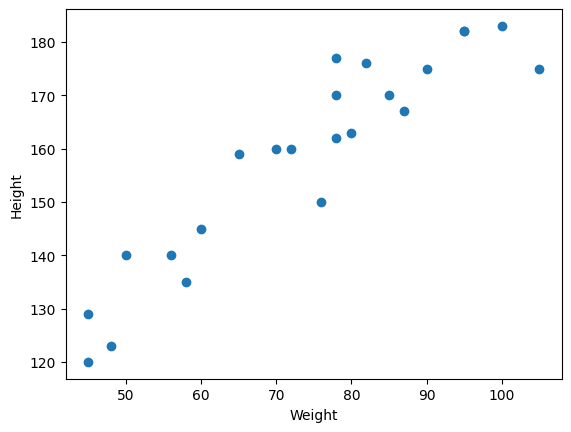

In [59]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [60]:
x = df[['Weight']]
y = df['Height']

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [63]:
x.shape

(23, 1)

In [64]:
x_train.shape

(18, 1)

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()

In [67]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

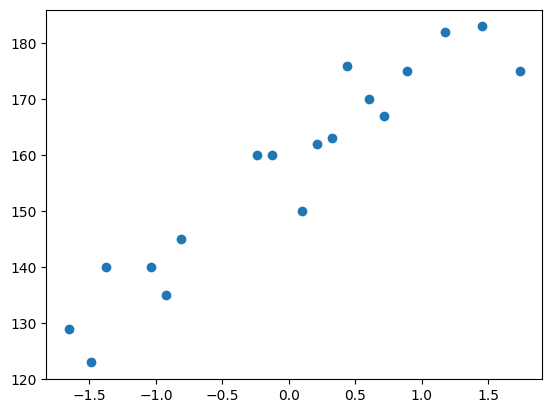

In [68]:
plt.scatter(x_train, y_train)
plt.show()

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
regressor = LinearRegression()

In [71]:
regressor.fit(x_train, y_train)

LinearRegression()

In [72]:
regressor.score(x_train, y_train), regressor.score(x_test, y_test)

(0.8930630841011482, 0.776986986042344)

In [73]:
regressor.coef_

array([17.03440872])

In [74]:
regressor.intercept_

np.float64(157.5)

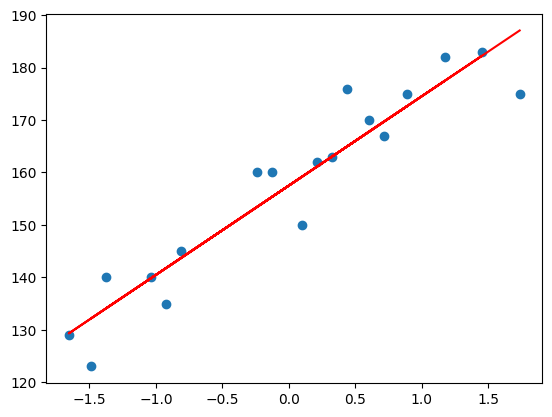

In [75]:
plt.scatter(x_train, y_train)
plt.plot(x_train, regressor.predict(x_train), color='red')
plt.show()

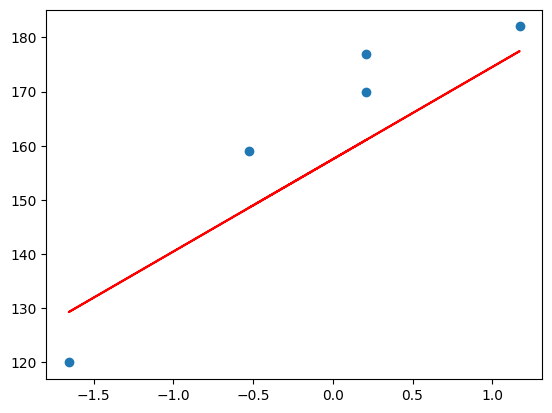

In [76]:
plt.scatter(x_test, y_test)
plt.plot(x_test, regressor.predict(x_test), color='red')
plt.show()

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [78]:
mse = mean_squared_error(y_test, regressor.predict(x_test))
mae = mean_absolute_error(y_test, regressor.predict(x_test))
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [79]:
from sklearn.metrics import r2_score

In [80]:
score = r2_score(y_test, regressor.predict(x_test))
score

0.776986986042344

In [81]:
scaled_weight = scaler.transform([[80]])
scaled_weight

C:\Users\ak845\PycharmProjects\AIML\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [82]:
regressor.predict(scaled_weight)

array([163.01076266])

In [83]:
residuals = y_test - regressor.predict(x_test)

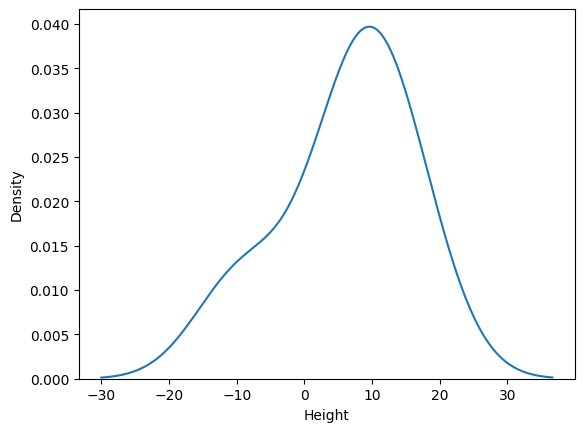

In [84]:
sns.kdeplot(residuals)
plt.show()